In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
# load database
data = pd.read_csv('subtrain-1.csv')
data.sample(n=5)

,fever,bodypain,age,runnynose,diffbreath,infected
394,99.053947,0.0,34.0,0.0,-1.0,0
1129,100.756222,1.0,53.0,1.0,1.0,0
197,102.690919,0.0,59.0,0.0,0.0,0
397,99.944433,0.0,61.0,1.0,1.0,0
854,101.628991,0.0,53.0,1.0,0.0,0


In [3]:
data.groupby('infected').infected.count()

infected
0    645
1    635
Name: infected, dtype: int64

In [4]:
data['fever'] = data['fever'].astype(int)

In [5]:
# data['bodypain'].replace({1: 40}, inplace=True)

In [6]:
data.describe()

,fever,bodypain,age,runnynose,diffbreath,infected
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,99.941406,0.496094,47.147656,0.485938,-0.061719,0.496094
std,1.412722,0.500180,20.256855,0.499998,0.812396,0.500180
min,98.000000,0.000000,12.000000,0.000000,-1.000000,0.000000
25%,99.000000,0.000000,29.000000,0.000000,-1.000000,0.000000
50%,100.000000,0.000000,48.000000,0.000000,0.000000,0.000000
75%,101.000000,1.000000,64.000000,1.000000,1.000000,1.000000
max,102.000000,1.000000,82.000000,1.000000,1.000000,1.000000


In [7]:
#Normalize the data
df_norm = data[['fever','bodypain','age','runnynose','diffbreath']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
df_norm

,fever,bodypain,age,runnynose,diffbreath
0,0.75,0.0,1.000000,0.0,1.0
1,0.25,0.0,0.428571,1.0,0.0
2,0.50,0.0,0.714286,0.0,0.5
3,0.00,1.0,0.000000,1.0,0.5
4,0.75,0.0,0.585714,1.0,1.0
...,...,...,...,...,...
1275,0.25,1.0,0.842857,0.0,1.0
1276,1.00,0.0,0.214286,0.0,1.0
1277,0.75,0.0,0.371429,0.0,0.0
1278,0.25,1.0,0.714286,1.0,0.0


In [9]:
#Convert the class labels to indexes for use with neural network.
# target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
# target.sample(n=5)
target = data[['infected']]
target.sample(n=5)

,infected
297,0
1135,1
637,1
388,0
993,0


In [10]:
train = pd.concat([df_norm, target], axis=1)

In [11]:
#Test data
test_data = pd.read_csv('test_3.csv')
test_data.sample(n=5)

,fever,bodypain,age,runnynose,diffbreath,infected
593,102.894687,0.0,45.0,0.0,0.0,1
192,102.344083,1.0,39.0,0.0,-1.0,0
0,102.833921,0.0,44.0,0.0,0.0,0
523,102.346089,1.0,16.0,1.0,1.0,1
200,100.818819,1.0,76.0,1.0,1.0,1


In [12]:
test_data['fever'] = test_data['fever'].astype(int)

In [13]:
#Normalize the data
test_data_norm = test_data[['fever','bodypain','age','runnynose','diffbreath']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [14]:
target_test = test_data[['infected']]
test = pd.concat([test_data_norm, target_test], axis=1)
test.sample(n=5)

,fever,bodypain,age,runnynose,diffbreath,infected
517,1.00,0.0,0.928571,1.0,1.0,0
75,1.00,1.0,0.342857,1.0,0.0,0
497,0.25,1.0,0.157143,0.0,0.5,1
107,0.50,1.0,0.271429,1.0,0.0,1
654,0.75,0.0,0.071429,0.0,0.0,1


In [15]:
X = train.values[:,:5]
X[:5]

array([[0.75      , 0.        , 1.        , 0.        , 1.        ],
       [0.25      , 0.        , 0.42857143, 1.        , 0.        ],
       [0.5       , 0.        , 0.71428571, 0.        , 0.5       ],
       [0.        , 1.        , 0.        , 1.        , 0.5       ],
       [0.75      , 0.        , 0.58571429, 1.        , 1.        ]])

In [16]:
targets = [[1,0], [0,1]]
y = np.array([targets[int(x)] for x in train.values[:,5:6]])
y[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [17]:
#Create backpropagating neural network
#Create 3 layers: Input, hidden and Output.
#Inputs = length and widths of the species
#Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa
#w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.
#Weight are randomized between -1 and 1.

num_inputs = len(X[0])
hidden_layer_neurons = 12
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765,
        -0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694,
         0.55876584, -0.60462985],
       [ 0.72598647,  0.96680135, -0.67231552,  0.19466789, -0.9820278 ,
        -0.22685743, -0.91167988,  0.91330594, -0.12770671,  0.89795461,
         0.57261197,  0.7325786 ],
       [-0.65366916, -0.85010283,  0.20148544, -0.66405563,  0.46676034,
        -0.18311228,  0.05581765,  0.87514317,  0.04339224, -0.78361323,
        -0.68355319,  0.0904053 ],
       [ 0.04880816,  0.27522049, -0.19700911,  0.29961022, -0.20619999,
         0.24783223,  0.53480993, -0.64205218, -0.24884846,  0.00506612,
         0.37333416, -0.4926407 ],
       [ 0.10948173,  0.24986169,  0.79100233, -0.27429282,  0.27511415,
        -0.6171072 , -0.00441177, -0.63510919,  0.83676608, -0.13635586,
         0.6603762 , -0.16644739]])

In [18]:
#w2 are the weights of connections between hidden layer and output layer.
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.80933518, -0.19034957],
       [-0.33765099,  0.14427754],
       [ 0.6908873 ,  0.72202862],
       [ 0.19137623, -0.83067678],
       [ 0.19453321, -0.50909258],
       [ 0.4651869 ,  0.78930258],
       [ 0.02946794,  0.20712702],
       [-0.86986438,  0.08014946],
       [-0.74162643,  0.22912569],
       [-0.27269931,  0.53551607],
       [-0.90293173, -0.78036376],
       [ 0.36804643,  0.02930739]])

In [19]:
learning_rate = 0.1 # slowly update the network
for epoch in range(10000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    er = (abs(y - l2)).mean()
    l2_delta = (y - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)

Error: 0.4158707427050362


In [20]:
#Test the network for accuracy.
#Run the network with the updated weights from training.
X = test.values[:,:5]
y = np.array([targets[int(x)] for x in test.values[:,5:6]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,5)

array([[0.56411, 0.43589],
       [0.5    , 0.5    ],
       [0.5744 , 0.4256 ],
       ...,
       [0.99056, 0.00944],
       [0.94784, 0.05216],
       [0.13435, 0.86565]])

In [21]:
yp = np.argmax(l2, axis=1) # prediction
sample_test = np.argmax(y, axis=1)
res = yp == sample_test
correct = np.sum(res)/len(res)

testres = test[['infected']]


testres['Prediction'] = yp

print(testres)
print('Correct:',np.sum(res),'/',len(res), ':', (correct*100),'%')

     infected  Prediction
0           0           0
1           0           0
2           0           0
3           0           0
4           0           0
..        ...         ...
661         1           0
662         1           0
663         1           0
664         1           0
665         0           1

[666 rows x 2 columns]
Correct: 358 / 666 : 53.753753753753756 %


<ipython-input-21-510963141ab2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testres['Prediction'] = yp


In [22]:
res

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False, False, False, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False,

In [23]:
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [24]:
sample_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [25]:
l2

array([[0.56411204, 0.43588798],
       [0.5       , 0.5       ],
       [0.57439525, 0.42560477],
       ...,
       [0.99055829, 0.00944172],
       [0.94784216, 0.05215786],
       [0.13434555, 0.86565415]])

In [26]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [27]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = [0, 1]

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0, 1]


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

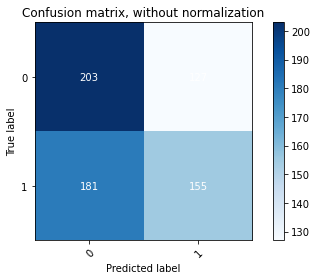

In [28]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(sample_test, yp, classes=class_names, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(sample_test, yp, classes=class_names , normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

In [29]:
accuracy_matrix = confusion_matrix(sample_test, yp)
print(accuracy_matrix)

[[203 127]
 [181 155]]


In [30]:
# Number of the class is the size of the matrix

size_of_matrix = 2


fold_out = []

x = 1
c = 0
for i in range(size_of_matrix):
    sum = 0
    for j in range(size_of_matrix):
        sum = sum + accuracy_matrix[i,j]

    x = x * (accuracy_matrix[i,i]/sum)
    print("Accuracy for Class ", c, ":", accuracy_matrix[i,i]/sum)
    fold_out.append(accuracy_matrix[i,i]/sum)
    c+=1

final_average = x**(1/size_of_matrix)

print("G-Mean Value: ", final_average)
print('Classification Accuracy:',np.sum(res),'/',len(res), ':', (correct*100),'%')

Accuracy for Class  0 : 0.6151515151515151
Accuracy for Class  1 : 0.46130952380952384
G-Mean Value:  0.5327055964838858
Classification Accuracy: 358 / 666 : 53.753753753753756 %


In [31]:
a = np.asarray(l2)
np.savetxt("output_value_1.csv", a, delimiter=",")